# SVM
## svm모델은 scaling 에 영향을 많이 받는다!!!!!

In [1]:
import pandas as pd
import numpy as np 
import warnings
import matplotlib
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

plt.rc('font',family = 'Malgun Gothic')
matplotlib.rc("axes",unicode_minus = False) # 음수표시 

In [2]:
df_raw = pd.read_csv("./실습화일/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

#결측치 확인
df_raw.isnull().sum()
df_raw["JOB"].fillna("Other",inplace = True)
#결측치 평균으로 대체
df_raw.fillna(df_raw.mean(),inplace=True)

#데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
#생성된 더미변수 확인
df_raw_dummy.head()

In [9]:
#설명,목표 변수 데이터 구분
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]
#데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3,random_state=1234)
print("분할 전 설명변수 데이터:",df_raw_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (3748, 18)
분할 후 설명변수 데이터:Train (2623, 18) Test (1125, 18)


In [11]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.908
Accuracy on test set: 0.908


In [12]:
#생성된 모델의 옵션 확인
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


## Cost(비용 C) : 오류(이상치)에 대한 패널티

- C가 클수록 오류를 적게 허용하여 과대적합 발생

- C가 작을수록 오류를 많이 허용하여 과소적합 발생

In [40]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#c:규제:(0.1,0.1,1,10,100)
para_c = [10 ** c for c in range(-2,3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state =1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.909,0.908
4,100.00,0.909,0.909


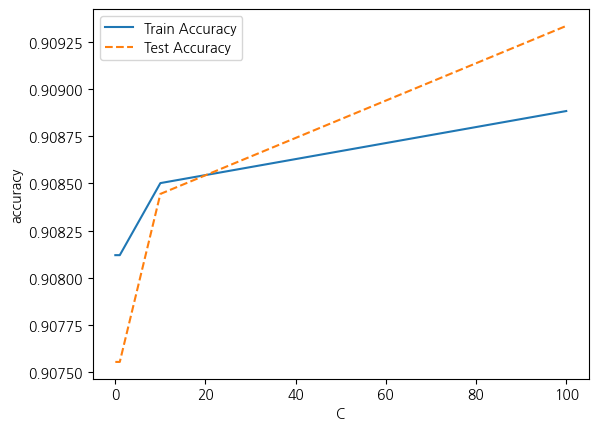

In [41]:
# 모델 정확도 그래프 확인
#모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_c, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [2]:
#C가 커질수록 모델의 정확도는 증가하지만 증가폭이 미미하고(0.2%) 
#과대적합 C>10 구간에서는 test 모델의 성능이 train보다 오히려 높음
#C의 영향이 크지 않음 -> 미지정

## Gamma(데이터의 영향 범위)변경에 따른 모델 성능

- gamma가 작을수록 1개 데이터의 영향력 거리가 커짐

- gamma가 클수록 1개 데이터 영향력 거리가 짧아짐 (뾰족한 모양)

C 와 gamma의 최적값 탐색필요

- C,gamma가 커질수록 모델 복잡도는 증가한다

- C,gamma가 작아질수록 모델 복잡도는 감소한다

In [24]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#gamma:규제:(0.1,0.1,1,10,100)
para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state =1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
# gamma별 정확도 테이블
df_accuracy_c.round(4)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.9081,0.9076
1,0.10,0.9081,0.9076
2,1.00,0.9081,0.9076
3,10.00,0.9085,0.9084
4,100.00,0.9089,0.9093


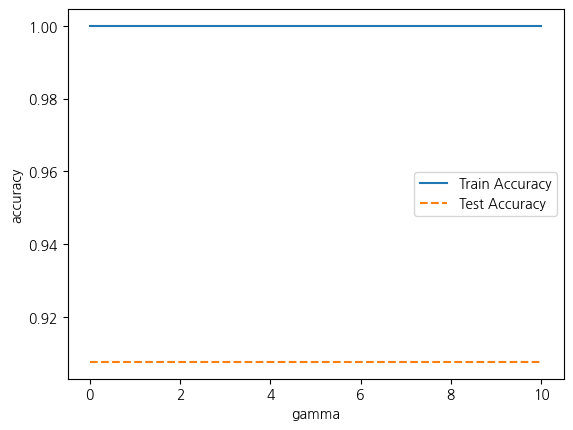

In [25]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("gamma")
plt.legend()

In [3]:
#gamma는 정확도에 별다른 영향을 미치지 않음 -> 미지정

Standardscaler 변환 - 설명변수 값의 구간을 동일하게 변경

In [30]:
v_feature_name = df_train_x.columns

#Standard
scaler = StandardScaler()
df_scaled =scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

#데이터 분할
df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled,test_size = 0.3,random_state=1234)
print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (2623, 18)
test data X size: (1125, 18)


In [32]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set: 0.944
Accuracy on test set: 0.935


- scale한 변수들로 성능을 측정한 결과 성능이 올라갔다.

## Cost(비용 C) : 오류(이상치)에 대한 패널티

In [42]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#c:규제:(0.1 ~ 20)
para_c = [0.1 * c for c in range(1,21)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state =1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.908,0.908
1,0.2,0.912,0.908
2,0.3,0.920,0.913
3,0.4,0.928,0.920
4,0.5,0.934,0.925
5,0.6,0.937,0.929
6,0.7,0.938,0.930
7,0.8,0.941,0.932
8,0.9,0.942,0.932
9,1.0,0.944,0.935


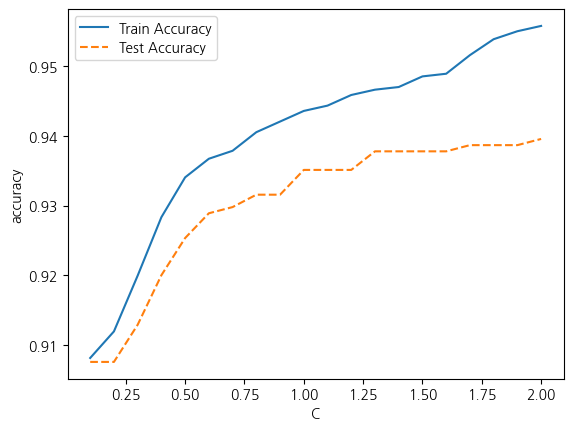

In [43]:
# 모델 정확도 그래프 확인
#모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_c, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

- C가 커질수록 모델의 정확도는 증가함. train/teat모델의 성능 변화를 검토하여 1.3 선택.
- test 모델의 정확도가 많이 증가하고 train과의 차이도 적음

## Gamma(데이터의 영향 범위)변경에 따른 모델 성능

In [47]:
## Gamma(데이터의 영향 범위)변경에 따른 모델 성능#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#gamma:규제
para_gamma = [0.05 * gamma for gamma in range(1,15)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1.3, random_state =1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
# gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.05,0.9440,0.9351
1,0.10,0.9645,0.9431
2,0.15,0.9760,0.9458
3,0.20,0.9802,0.9396
4,0.25,0.9836,0.9351
5,0.30,0.9851,0.9324
6,0.35,0.9859,0.9307
7,0.40,0.9878,0.9298
8,0.45,0.9905,0.9289
9,0.50,0.9916,0.9289


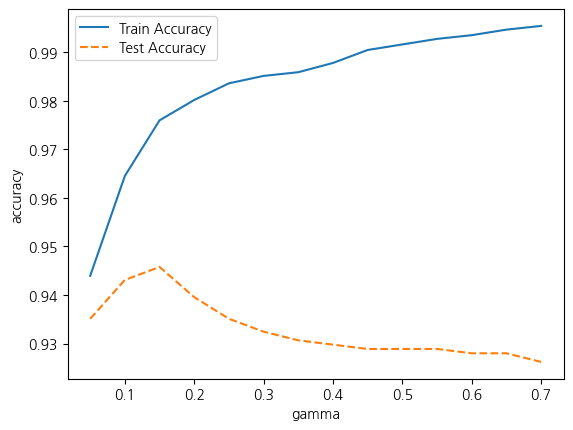

In [48]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("gamma")
plt.legend()

In [50]:
#최종 모델 선정
svc_final = SVC(gamma=0.15, C=1.3, random_state = 1234)
svc_final.fit(df_scaled_train_x,df_train_y)

y_pred = svc_final.predict(df_scaled_test_x)
print("Accuracy on training Set : {:.3f}\n".format(svc_final.score(df_scaled_train_x,df_train_y)))

print("Accuracy on test Set : {:.3f}\n".format(svc_final.score(df_scaled_test_x,df_test_y)))

print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training Set : 0.976

Accuracy on test Set : 0.946

Confusion matrix:
[[1021    0]
 [  61   43]]
              precision    recall  f1-score   support

           0      0.944     1.000     0.971      1021
           1      1.000     0.413     0.585       104

    accuracy                          0.946      1125
   macro avg      0.972     0.707     0.778      1125
weighted avg      0.949     0.946     0.935      1125



- 1기준 f1 score는 58.5%
- (precision은 100%이나 recall이 매우 낮음)

## GridSearchCV를 이용한 최적 parameter찾기

In [51]:
# GridSearchCV를 이용한 최적 parameter찾기
estimator = SVC(random_state=1234)

# 구하고자 하는 parameter와 범위
param_grid = {"C":para_c,
             "gamma":para_gamma}

# 정확도가 높은 최적 parameter와 범위
grid_svc = GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs=-1)
grid_svc.fit(df_scaled_train_x,df_train_y)

print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter: \n{}".format(grid_svc.best_params_))
print("\nbest score: \n{}".format(grid_svc.best_score_.round(3))) # best_score는 test 데이터에 대한 

best estimator model: 
SVC(C=2.0, gamma=0.15000000000000002, random_state=1234)

best parameter: 
{'C': 2.0, 'gamma': 0.15000000000000002}

best score: 
0.95


## 결론

- svm은 scale에 영향을 많이 받음
- 적절한 C와 gamma를 찾기 전에 scale 변환이 선행되어야 함.